### Import Libraries for data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


### Import immoweb csv file

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


df_immoweb = pd.read_csv('immoweb_BE.csv')
df_immoweb.head()

,propertyImmoCode,provinceCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,landSurface,constructionYear,EPC,floors,facades,rooms,bedrooms,bathrooms,showerrooms,kitchenSurface,atticSurface,basementSurface,livingroomSurface,diningroomSurface,gardenSurface,terraceSurface,hasSwimmingpool
0,10167355,WHT,7160,125000.0,1,NaN,NaN,NaN,0.0,NaN,157.0,NaN,NaN,NaN,3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10167354,WHT,7973,190000.0,1,11.0,6.0,NaN,1700.0,NaN,629.0,NaN,4.0,NaN,3,1.0,0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
2,10167353,VBR,1500,330000.0,2,16.0,2.0,156.0,NaN,2010.0,119.0,NaN,NaN,NaN,3,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN
3,10167351,WBR,1380,1750000.0,1,6.0,1.0,550.0,4600.0,1997.0,NaN,NaN,4.0,8.0,7,4.0,4,NaN,NaN,NaN,NaN,1.0,4600.0,100.0,NaN
4,10167350,WHT,7301,110000.0,1,NaN,6.0,NaN,280.0,NaN,592.0,NaN,2.0,NaN,4,1.0,0,6.0,NaN,NaN,25.0,1.0,NaN,NaN,NaN


#### Data Exploration

In [4]:
df_immoweb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   propertyImmoCode   9739 non-null   int64  
 1   provinceCode       9739 non-null   object 
 2   postalCode         9739 non-null   int64  
 3   salePrice          9737 non-null   float64
 4   propertyType       9739 non-null   int64  
 5   propertySubtype    2324 non-null   float64
 6   buildingCondition  7072 non-null   float64
 7   propertySurface    8130 non-null   float64
 8   landSurface        6315 non-null   float64
 9   constructionYear   5546 non-null   float64
 10  EPC                7551 non-null   float64
 11  floors             1922 non-null   float64
 12  facades            7148 non-null   float64
 13  rooms              466 non-null    float64
 14  bedrooms           9739 non-null   int64  
 15  bathrooms          8337 non-null   float64
 16  showerrooms        9739 

In [5]:
# Split dataframe into two based on house or apartment. NB: Appartment=2, House=1
df_house = df_immoweb[df_immoweb['propertyType'] == 1]
df_apartment = df_immoweb[df_immoweb['propertyType'] == 2]


In [6]:
df_immoweb['propertyType'].unique()

array([1, 2], dtype=int64)

#### Percentage of missing values per column


In [7]:
(df_immoweb.isnull().sum(axis = 0)* 100 / len(df_immoweb)).sort_values(ascending=True)


propertyImmoCode      0.000000
provinceCode          0.000000
postalCode            0.000000
propertyType          0.000000
showerrooms           0.000000
bedrooms              0.000000
salePrice             0.020536
bathrooms            14.395729
propertySurface      16.521203
EPC                  22.466372
facades              26.604374
buildingCondition    27.384742
landSurface          35.157614
livingroomSurface    37.252285
terraceSurface       41.564842
constructionYear     43.053702
basementSurface      55.929767
kitchenSurface       63.815587
gardenSurface        65.109354
propertySubtype      76.137180
floors               80.264914
diningroomSurface    80.737242
atticSurface         84.752028
rooms                95.215114
hasSwimmingpool      97.997741
dtype: float64

## Which variables would you delete and why ?


##### Notice from above that dropping null values results to an empty dataframe. Further investigations are carried out

#### All columns with more 80% missing values will be removed since they carry no information.

In [8]:
# Percentage of missing values for houses
(df_house.isnull().sum(axis = 0)* 100 / len(df_house)).sort_values(ascending=True)


propertyImmoCode       0.000000
provinceCode           0.000000
postalCode             0.000000
propertyType           0.000000
showerrooms            0.000000
bedrooms               0.000000
landSurface            0.000000
salePrice              0.031671
bathrooms             14.410135
facades               18.859857
EPC                   19.303246
propertySurface       20.316706
buildingCondition     26.714173
livingroomSurface     37.165479
terraceSurface        45.843230
constructionYear      46.603325
gardenSurface         53.475851
basementSurface       54.378464
kitchenSurface        62.042755
diningroomSurface     75.249406
propertySubtype       75.819477
atticSurface          76.943785
rooms                 95.249406
hasSwimmingpool       97.165479
floors               100.000000
dtype: float64

In [9]:
print(len(df_house))


6315


In [10]:
# Percentage of missing values for apartments
(df_apartment.isnull().sum(axis = 0)* 100 / len(df_apartment)).sort_values(ascending=True)


propertyImmoCode       0.000000
provinceCode           0.000000
postalCode             0.000000
salePrice              0.000000
propertyType           0.000000
showerrooms            0.000000
bedrooms               0.000000
propertySurface        9.521028
bathrooms             14.369159
EPC                   28.300234
buildingCondition     28.621495
terraceSurface        33.674065
constructionYear      36.507009
livingroomSurface     37.412383
facades               40.887850
floors                43.866822
basementSurface       58.790888
kitchenSurface        67.085280
propertySubtype       76.723131
gardenSurface         86.565421
diningroomSurface     90.858645
rooms                 95.151869
atticSurface          99.153037
hasSwimmingpool       99.532710
landSurface          100.000000
dtype: float64

In [11]:
print(len(df_apartment))


3424


##### Notice that when we split the dataframes on the basis of types(House or Apartment) while looking at missing values, it becomes immediately clear that "land_surface" is missing for all apartments(all 4190 observations) it will be advicable to drop such a variable from the analysis since it may cause bias. Same applies for "wellnessEquipment_hasSwimmingPool", "condition_isNewlyBuilt", "outdoor_garden_surface"

#### Drop columns with too many missing values

In [12]:
# Drop columns with many missing values >80% missing values
# Land surface: Values available only for houses, none available for apartments
# hasSwimmingpool has 97.997741% missing values overall. Represents Little or no information
# rooms 95.215114% missing values overall. Represents Little or no information
# atticSurface 84.752028% missing values overall. Represents Little or no information
# floors 80.26491% missing values overall. Represents Little or no information
# diningroomSurface 80.737242% missing values overall. Represents Little or no information


df_immoweb1 = df_immoweb.drop(['landSurface', 'hasSwimmingpool', 'rooms', 'atticSurface', 'floors', 'diningroomSurface'], axis=1)
df_immoweb1.head()

,propertyImmoCode,provinceCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
0,10167355,WHT,7160,125000.0,1,NaN,NaN,NaN,NaN,157.0,NaN,3,NaN,0,NaN,NaN,NaN,NaN,NaN
1,10167354,WHT,7973,190000.0,1,11.0,6.0,NaN,NaN,629.0,4.0,3,1.0,0,NaN,NaN,1.0,NaN,NaN
2,10167353,VBR,1500,330000.0,2,16.0,2.0,156.0,2010.0,119.0,NaN,3,2.0,1,NaN,NaN,NaN,NaN,11.0
3,10167351,WBR,1380,1750000.0,1,6.0,1.0,550.0,1997.0,NaN,4.0,7,4.0,4,NaN,NaN,NaN,4600.0,100.0
4,10167350,WHT,7301,110000.0,1,NaN,6.0,NaN,NaN,592.0,2.0,4,1.0,0,6.0,NaN,25.0,NaN,NaN


## Start data preparation


### Step 1: Data Cleaning

#### a) Remove duplicates

In [13]:
# Size of dataframe before dropping duplicates
df_immoweb1.shape

(9739, 19)

In [14]:
# Drop duplicates and check the size of the new dataframe
df_immo = df_immoweb1.drop_duplicates()
df_immo.shape

(9686, 19)

In [15]:
# Count the number of duplicates
len(df_immoweb1)-len(df_immo)


53

In [16]:
df_immoweb1.describe()

,propertyImmoCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
count,9.739000e+03,9739.000000,9.737000e+03,9739.000000,2324.000000,7072.000000,8130.000000,5546.000000,7.551000e+03,7148.000000,9739.000000,8337.000000,9739.000000,3524.000000,4292.000000,6111.000000,3398.000000,5691.000000
mean,1.014581e+07,5015.015710,3.915524e+05,1.351576,11.500000,2.634333,171.968758,1978.385503,1.528589e+03,2.769866,2.953589,1.350126,0.313585,14.366913,7.023066,24.590738,417.555032,15.947812
std,5.197788e+04,3103.065137,3.299955e+05,0.477487,4.705855,1.845327,241.748508,156.764719,1.001050e+05,0.876319,1.801594,1.296727,4.294369,25.006128,22.635648,27.796035,2894.557484,36.947917
min,8.754489e+06,1000.000000,1.385000e+03,1.000000,1.000000,1.000000,17.000000,1760.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.015076e+07,2140.000000,2.250000e+05,1.000000,8.000000,1.000000,97.000000,1957.000000,1.850000e+02,2.000000,2.000000,1.000000,0.000000,9.000000,1.000000,1.000000,1.000000,1.000000
50%,1.015673e+07,4171.000000,3.100000e+05,1.000000,11.000000,2.000000,143.000000,1976.000000,2.930000e+02,3.000000,3.000000,1.000000,0.000000,12.000000,1.000000,27.000000,45.000000,7.000000
75%,1.016205e+07,8400.000000,4.450000e+05,2.000000,16.000000,4.000000,200.000000,2007.000000,4.480000e+02,4.000000,4.000000,1.000000,0.000000,17.000000,1.000000,36.000000,250.000000,20.000000
max,1.016736e+07,9992.000000,5.250000e+06,2.000000,22.000000,6.000000,17842.000000,9999.000000,8.698102e+06,8.000000,90.000000,82.000000,415.000000,1065.000000,700.000000,1529.000000,80000.000000,2010.000000


#### b) Remove Null values

In [17]:
# Check if null value exist and replace with 0
df_immoweb2 = df_immoweb1.fillna(0)


In [18]:
# Test it 
df_immoweb2.isna().sum(axis = 0)


propertyImmoCode     0
provinceCode         0
postalCode           0
salePrice            0
propertyType         0
propertySubtype      0
buildingCondition    0
propertySurface      0
constructionYear     0
EPC                  0
facades              0
bedrooms             0
bathrooms            0
showerrooms          0
kitchenSurface       0
basementSurface      0
livingroomSurface    0
gardenSurface        0
terraceSurface       0
dtype: int64

In [19]:
len(df_immoweb2)

9739

In [20]:
df_immoweb2.head()

,propertyImmoCode,provinceCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
0,10167355,WHT,7160,125000.0,1,0.0,0.0,0.0,0.0,157.0,0.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
1,10167354,WHT,7973,190000.0,1,11.0,6.0,0.0,0.0,629.0,4.0,3,1.0,0,0.0,0.0,1.0,0.0,0.0
2,10167353,VBR,1500,330000.0,2,16.0,2.0,156.0,2010.0,119.0,0.0,3,2.0,1,0.0,0.0,0.0,0.0,11.0
3,10167351,WBR,1380,1750000.0,1,6.0,1.0,550.0,1997.0,0.0,4.0,7,4.0,4,0.0,0.0,0.0,4600.0,100.0
4,10167350,WHT,7301,110000.0,1,0.0,6.0,0.0,0.0,592.0,2.0,4,1.0,0,6.0,0.0,25.0,0.0,0.0


#### c) Remove blank spaces

In [21]:
# Check column types
df_immoweb2.dtypes

propertyImmoCode       int64
provinceCode          object
postalCode             int64
salePrice            float64
propertyType           int64
propertySubtype      float64
buildingCondition    float64
propertySurface      float64
constructionYear     float64
EPC                  float64
facades              float64
bedrooms               int64
bathrooms            float64
showerrooms            int64
kitchenSurface       float64
basementSurface      float64
livingroomSurface    float64
gardenSurface        float64
terraceSurface       float64
dtype: object

In [22]:
# Creating a function which will remove extra leading
# and tailing whitespace from the data.
# pass dataframe as a parameter here
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].str.strip()
        else:
             
            # if condition is False then it will do nothing.
            pass
    return dataframe
        
 
# applying whitespace_remover function on dataframe
df_immo_blank = whitespace_remover(df_immoweb2)


In [23]:
df_immo_blank.head()
df_immo_blank.tail()

,propertyImmoCode,provinceCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
9734,10146864,VBR,3140,1895000.0,1,11.0,2.0,411.0,1929.0,382.0,4.0,5,3.0,0,18.0,1.0,50.0,0.0,130.0
9735,10146863,BBR,1180,398000.0,2,0.0,2.0,94.0,2014.0,67.0,0.0,2,2.0,2,0.0,1.0,33.0,0.0,0.0
9736,10146862,BBR,1150,895000.0,1,11.0,6.0,200.0,1961.0,274.0,3.0,3,1.0,1,7.0,0.0,45.0,200.0,12.0
9737,10146860,VAN,2850,429000.0,2,0.0,0.0,97.0,2019.0,35.0,0.0,2,1.0,0,0.0,0.0,0.0,0.0,58.0
9738,10146859,VWV,8400,349000.0,1,7.0,1.0,0.0,0.0,150.0,2.0,1,1.0,0,0.0,1.0,0.0,0.0,0.0


### Step 2: Data Analysis

#### Number of rows and columns

In [24]:
df_immo_blank.shape

(9739, 19)

In [25]:
# Number of rows
len(df_immo_blank)

9739

In [26]:
print(f"Number of rows: {len(df_immo_blank)}")
print(f"Number of columns: {len(df_immo_blank.columns)}")

Number of rows: 9739
Number of columns: 19


#### What is the correlation between the variables and the price? (Why might that be?)


In [27]:
df_immo_blank.head()

,propertyImmoCode,provinceCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
0,10167355,WHT,7160,125000.0,1,0.0,0.0,0.0,0.0,157.0,0.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
1,10167354,WHT,7973,190000.0,1,11.0,6.0,0.0,0.0,629.0,4.0,3,1.0,0,0.0,0.0,1.0,0.0,0.0
2,10167353,VBR,1500,330000.0,2,16.0,2.0,156.0,2010.0,119.0,0.0,3,2.0,1,0.0,0.0,0.0,0.0,11.0
3,10167351,WBR,1380,1750000.0,1,6.0,1.0,550.0,1997.0,0.0,4.0,7,4.0,4,0.0,0.0,0.0,4600.0,100.0
4,10167350,WHT,7301,110000.0,1,0.0,6.0,0.0,0.0,592.0,2.0,4,1.0,0,6.0,0.0,25.0,0.0,0.0


In [28]:
df_immo_blank.tail()

,propertyImmoCode,provinceCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
9734,10146864,VBR,3140,1895000.0,1,11.0,2.0,411.0,1929.0,382.0,4.0,5,3.0,0,18.0,1.0,50.0,0.0,130.0
9735,10146863,BBR,1180,398000.0,2,0.0,2.0,94.0,2014.0,67.0,0.0,2,2.0,2,0.0,1.0,33.0,0.0,0.0
9736,10146862,BBR,1150,895000.0,1,11.0,6.0,200.0,1961.0,274.0,3.0,3,1.0,1,7.0,0.0,45.0,200.0,12.0
9737,10146860,VAN,2850,429000.0,2,0.0,0.0,97.0,2019.0,35.0,0.0,2,1.0,0,0.0,0.0,0.0,0.0,58.0
9738,10146859,VWV,8400,349000.0,1,7.0,1.0,0.0,0.0,150.0,2.0,1,1.0,0,0.0,1.0,0.0,0.0,0.0


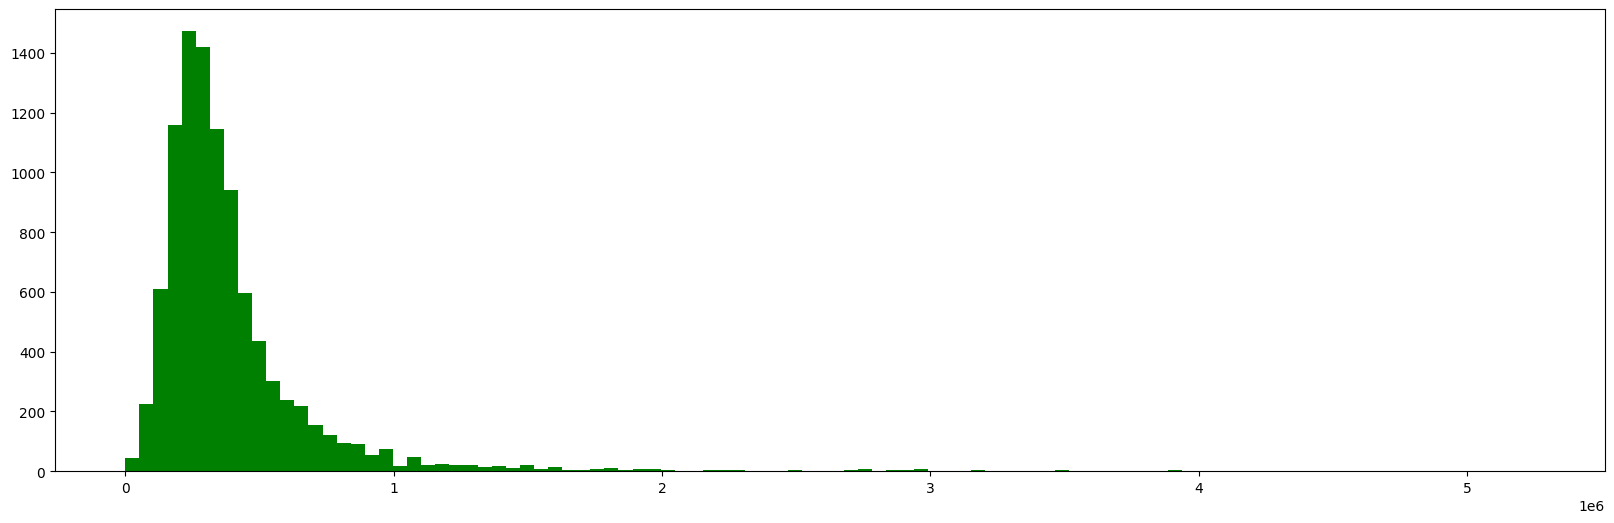

In [29]:
plt.figure(figsize=(20,6))
plt.hist(df_immo_blank['salePrice'], bins=100, color ='green');

<AxesSubplot: xlabel='salePrice', ylabel='Density'>

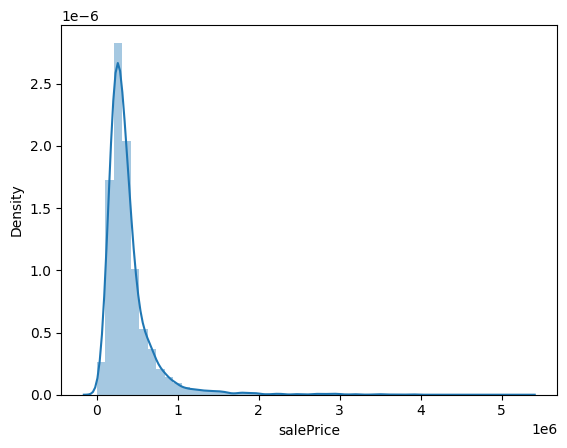

In [30]:
sns.distplot(df_immo_blank['salePrice'])

### Identify Outliers using boxplot
Plot the outliers.


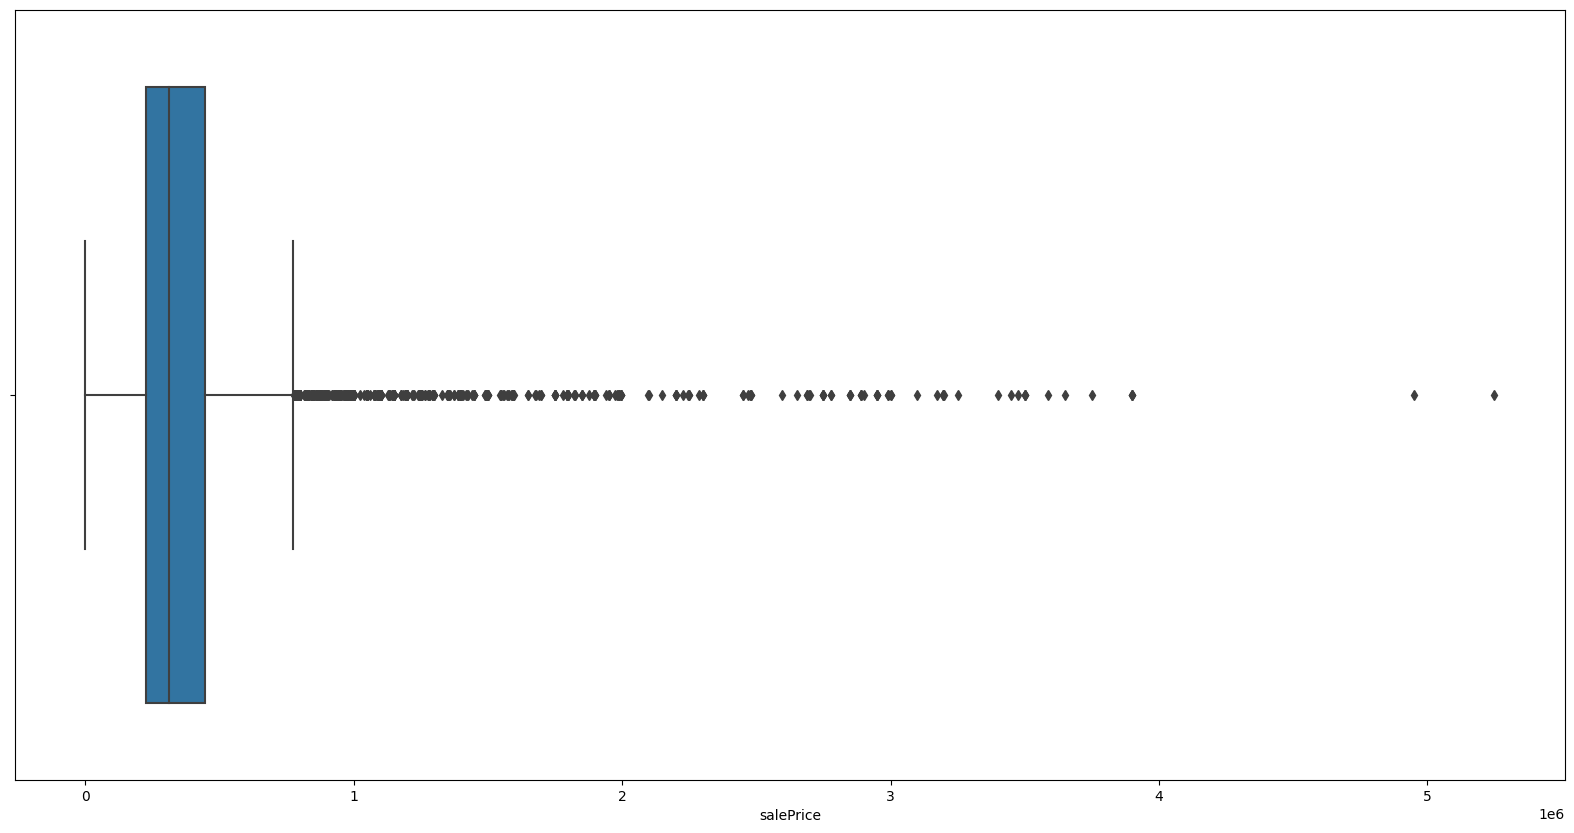

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df_immo_blank['salePrice']);

<AxesSubplot: xlabel='salePrice'>

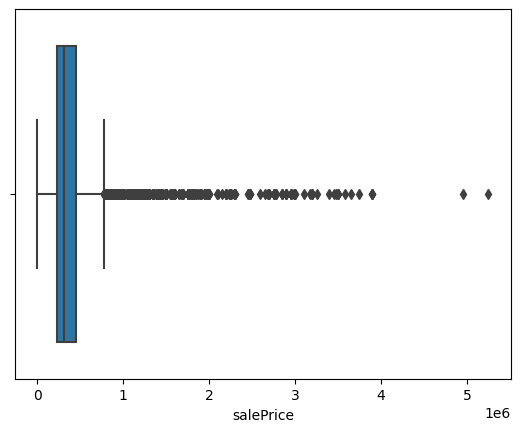

In [32]:
import seaborn as sns
df_immo_blank = whitespace_remover(df_immoweb2)
sns.boxplot(x=df_immo_blank['salePrice'])

In [33]:
# Defining a function using the interquartile range (IQR) technique
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df_immo_blank, "salePrice")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  775000.0
Lower Whisker:  -105000.0


In [34]:
# Defining the outlier variable
df_immo_blank[(df_immo_blank['salePrice'] < lower) | (df_immo_blank['salePrice'] > upper)]
df_immo_without_outlier = df_immo_blank[(df_immo_blank['salePrice'] > lower) & (df_immo_blank['salePrice'] < upper)]


### Represent the number of properties according to their surface using a histogram.


array([<AxesSubplot: title={'center': '1'}>,
       <AxesSubplot: title={'center': '2'}>], dtype=object)

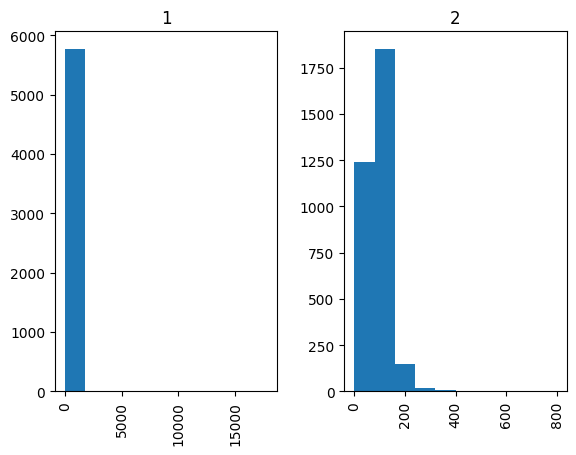

In [35]:
df_immo_without_outlier['propertySurface'].hist(by=df_immo_without_outlier['propertyType'])


### Bivariate Analysis

##### Bivariate analysis explores the association between two variables without any cause and effect relationship

In [36]:
continuos_var = ['postalCode', 'salePrice',
       'propertyType', 'propertySubtype', 'buildingCondition',
       'propertySurface', 'constructionYear', 'EPC', 'facades', 'bedrooms',
       'bathrooms', 'showerrooms', 'kitchenSurface', 'basementSurface',
       'livingroomSurface', 'gardenSurface', 'terraceSurface']
categorical_var = ['provinceCode']

In [37]:
corrMatrix = df_immo_without_outlier.corr()

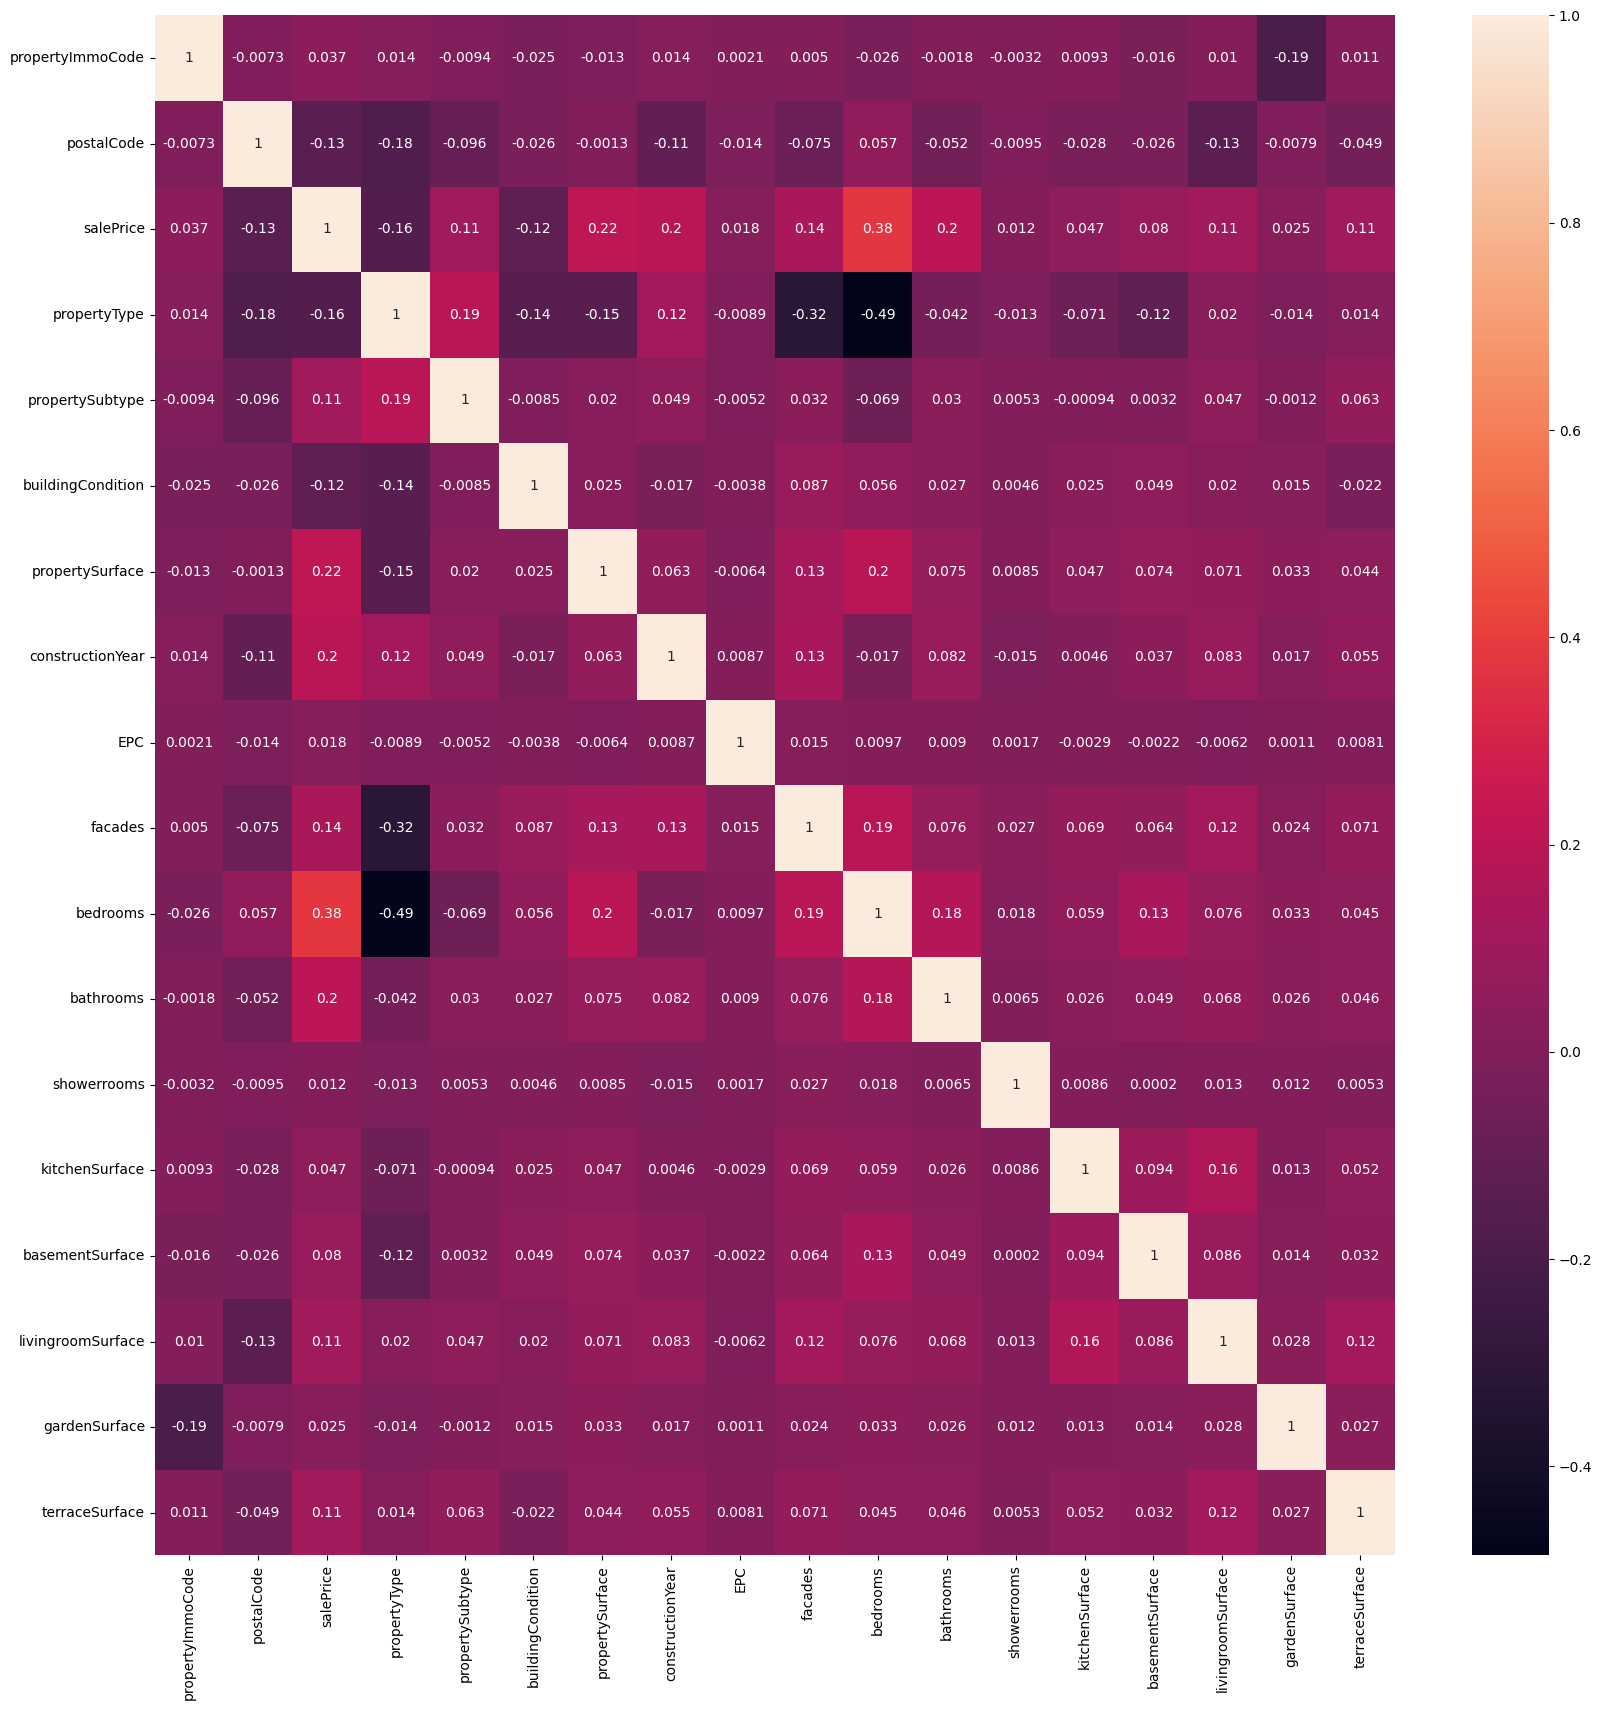

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### How are variables correlated to each other? (Why?)


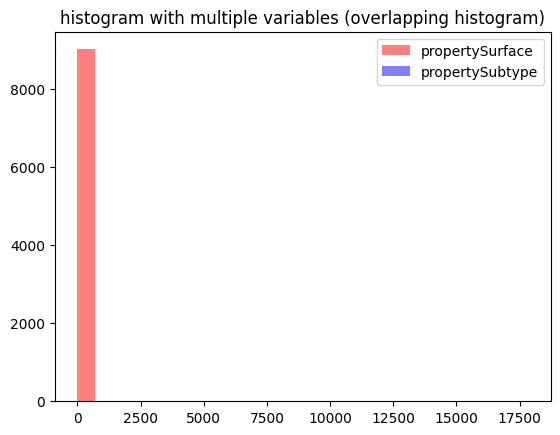

In [39]:
# Explain correlation between explanatory variables
plt.hist(df_immo_without_outlier['propertySurface'],bins = 25, alpha = 0.5, 
         color = 'red')
plt.hist(df_immo_without_outlier['propertySubtype'],bins = 25, alpha = 0.5,
         color = 'blue')
# plt.hist(df_immo_without_outlier['buildingCondition'],bins = 25, alpha = 0.5,
#          color = 'green')
  
plt.title("histogram with multiple \
variables (overlapping histogram)")
plt.legend(['propertySurface','propertySubtype','buildingCondition'])

<AxesSubplot: >

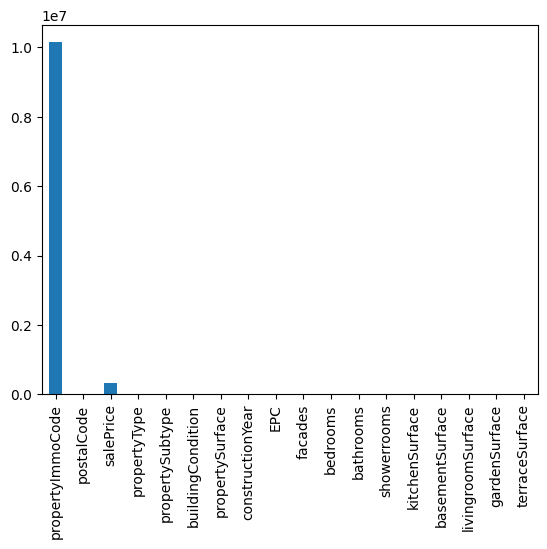

In [40]:
#Which variables have the greatest influence on the price?
average = df_immo_without_outlier.mean()
average.name = 'average'
df_immo_without_outlier.append(average)
df_immo_without_outlier.mean().plot(kind='bar')
#<matplotlib.axes.AxesSubplot at 0x4a327d0>

TypeError: 'FacetGrid' object is not callable

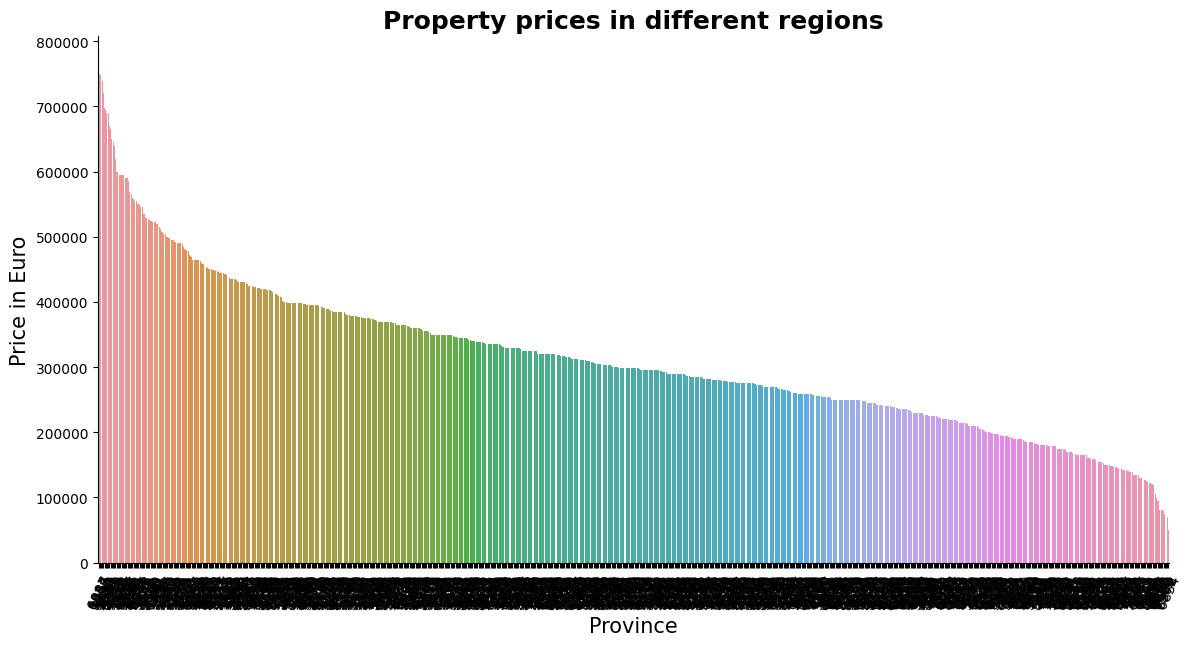

In [41]:
median = df_immo_without_outlier.groupby('postalCode')['salePrice'].median().sort_values(ascending=False).index.values

import matplotlib.pyplot as plt
import seaborn as sns
plot = sns.catplot( data= df_immo_without_outlier, y='salePrice',  x='postalCode',kind='bar',errorbar=None, legend_out=False,
order= median,estimator='median', height=6, aspect=2)
plt.title('Property prices in different regions', weight='bold').set_fontsize(18)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Price in Euro', fontsize=15)
plt.xticks(rotation=65)
plot()


TypeError: 'FacetGrid' object is not callable

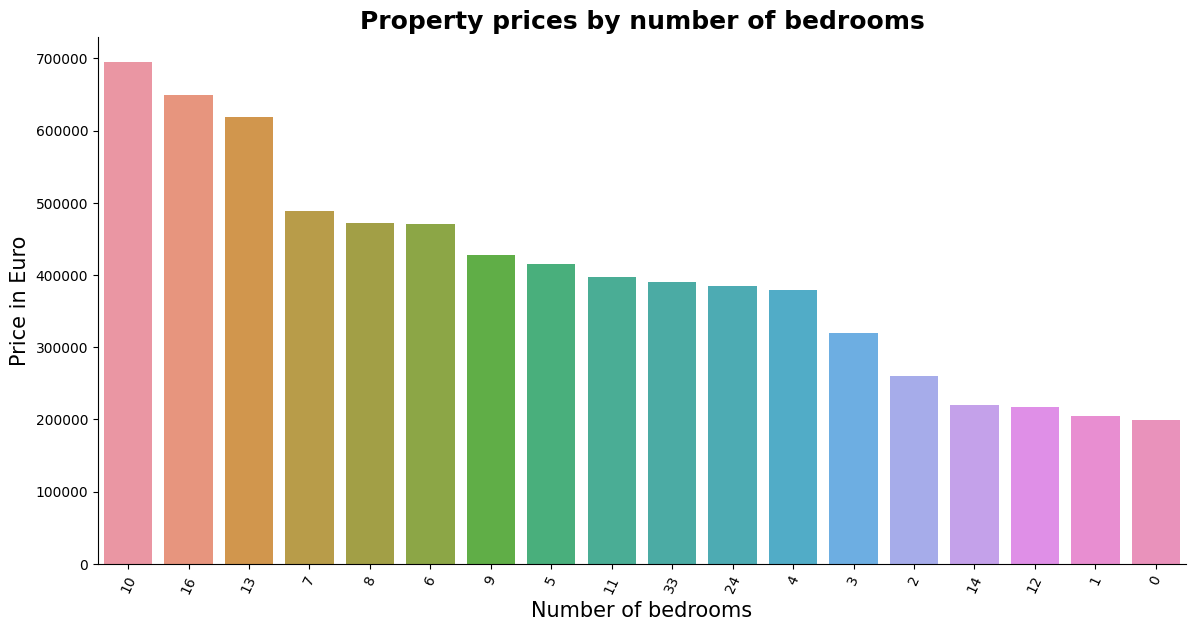

In [ ]:
median = df_immo_without_outlier.groupby('bedrooms')['salePrice'].median().sort_values(ascending=False).index.values

import matplotlib.pyplot as plt
import seaborn as sns
plot = sns.catplot( data= df_immo_without_outlier, y='salePrice',  x='bedrooms',kind='bar',errorbar=None, legend_out=False,
order= median,estimator='median', height=6, aspect=2)
plt.title('Property prices by number of bedrooms', weight='bold').set_fontsize(18)
plt.xlabel('Number of bedrooms', fontsize=15)
plt.ylabel('Price in Euro', fontsize=15)
plt.xticks(rotation=65)
plot()

TypeError: 'FacetGrid' object is not callable

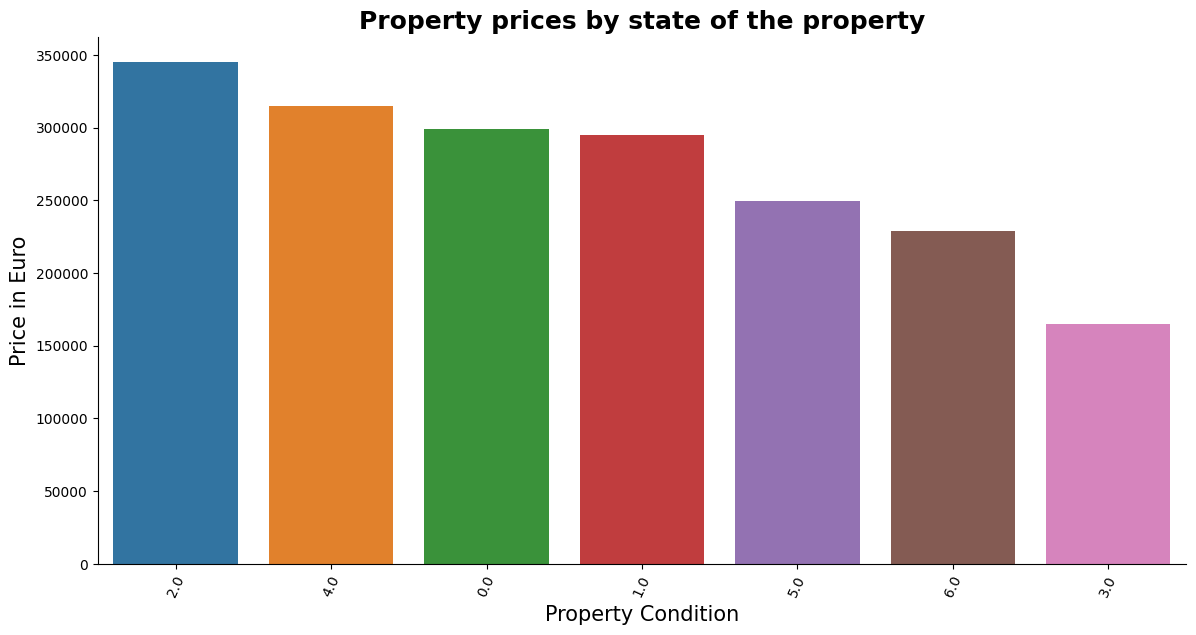

In [ ]:
median = df_immo_without_outlier.groupby('buildingCondition')['salePrice'].median().sort_values(ascending=False).index.values

import matplotlib.pyplot as plt
import seaborn as sns
plot = sns.catplot( data= df_immo_without_outlier, y='salePrice',  x='buildingCondition',kind='bar',errorbar=None, legend_out=False,
order= median,estimator='median', height=6, aspect=2)
plt.title('Property prices by state of the property', weight='bold').set_fontsize(18)
plt.xlabel('Property Condition', fontsize=15)
plt.ylabel('Price in Euro', fontsize=15)
plt.xticks(rotation=65)
plot()

TypeError: 'FacetGrid' object is not callable

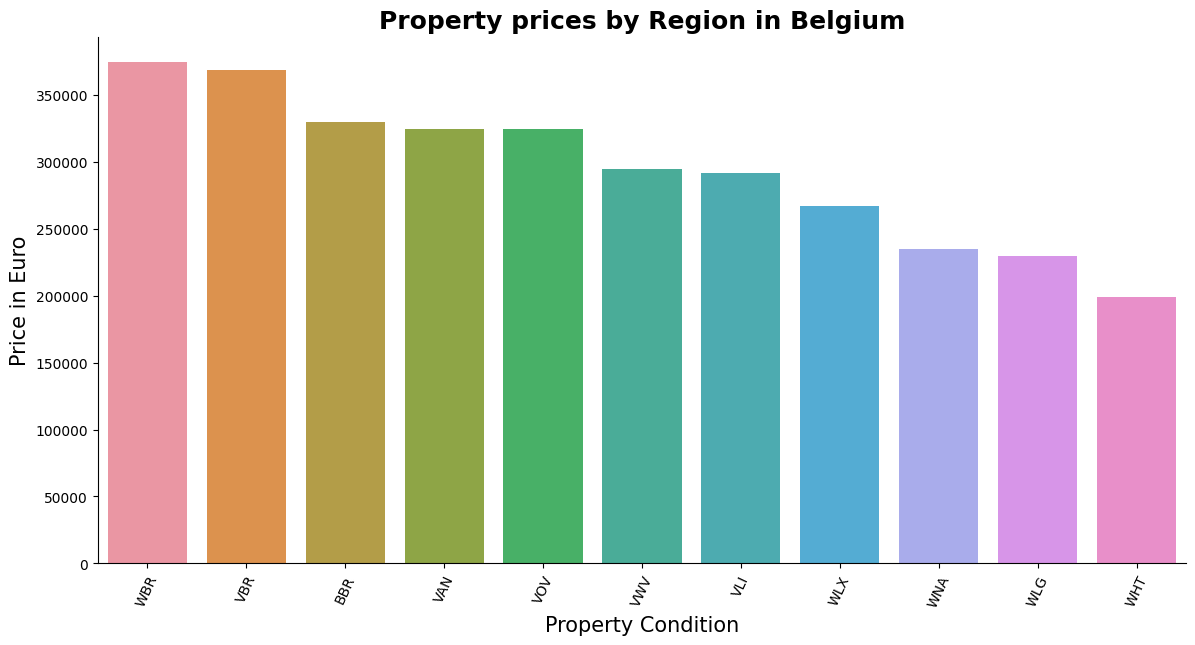

In [ ]:
median = df_immo_without_outlier.groupby('provinceCode')['salePrice'].median().sort_values(ascending=False).index.values

import matplotlib.pyplot as plt
import seaborn as sns
plot = sns.catplot( data= df_immo_without_outlier, y='salePrice',  x='provinceCode',kind='bar',errorbar=None, legend_out=False,
order= median,estimator='median', height=6, aspect=2)
plt.title('Property prices by Region in Belgium', weight='bold').set_fontsize(18)
plt.xlabel('Property Condition', fontsize=15)
plt.ylabel('Price in Euro', fontsize=15)
plt.xticks(rotation=65)
plot()

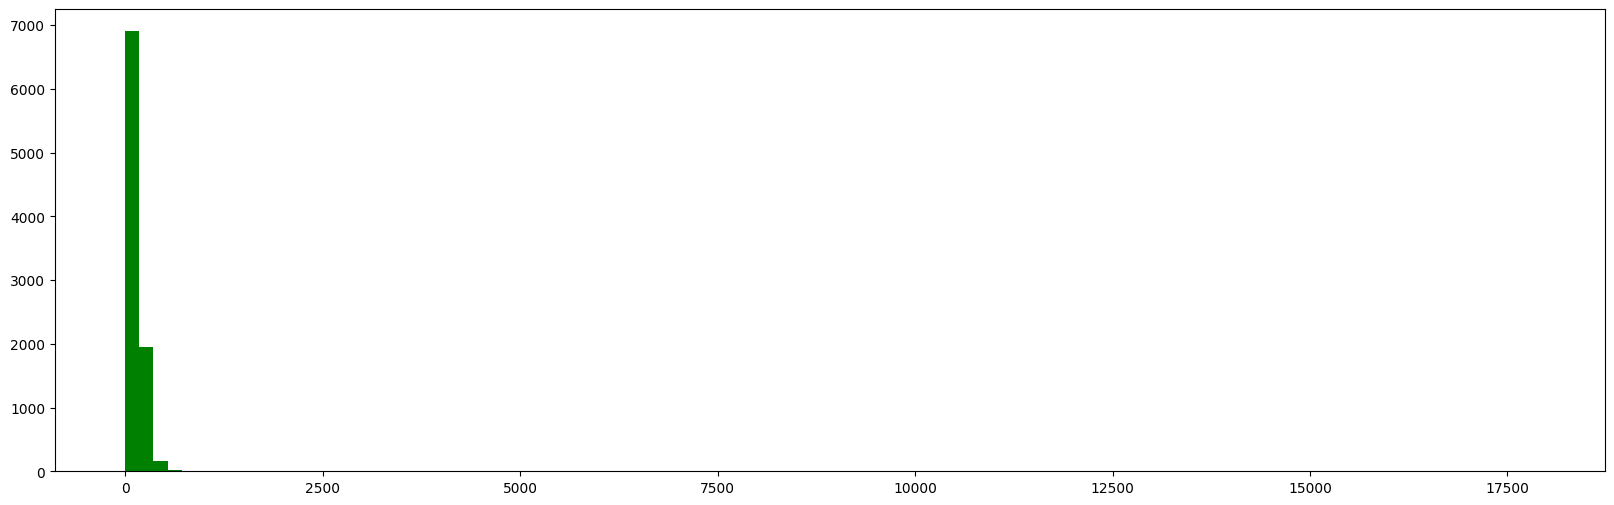

In [ ]:
plt.figure(figsize=(20,6))
plt.hist(df_immo_without_outlier['propertySurface'], bins=100, color ='green');


In [ ]:
df = df_immo_without_outlier
df.head()

,propertyImmoCode,provinceCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
0,10167355,WHT,7160,125000.0,1,0.0,0.0,0.0,0.0,157.0,0.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
1,10167354,WHT,7973,190000.0,1,11.0,6.0,0.0,0.0,629.0,4.0,3,1.0,0,0.0,0.0,1.0,0.0,0.0
2,10167353,VBR,1500,330000.0,2,16.0,2.0,156.0,2010.0,119.0,0.0,3,2.0,1,0.0,0.0,0.0,0.0,11.0
4,10167350,WHT,7301,110000.0,1,0.0,6.0,0.0,0.0,592.0,2.0,4,1.0,0,6.0,0.0,25.0,0.0,0.0
5,10167349,VAN,2170,198000.0,2,0.0,5.0,91.0,1991.0,252.0,0.0,2,1.0,0,0.0,0.0,0.0,0.0,4.0


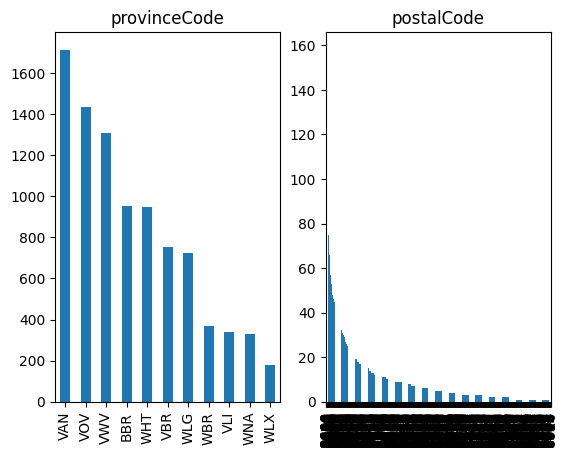

In [ ]:
categorical_features = ['provinceCode', 'postalCode']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_features in enumerate(df[categorical_features]):
    df[categorical_features].value_counts().plot(kind='bar', ax=ax[i]).set_title(categorical_features)
fig.show()


<AxesSubplot: xlabel='propertyType', ylabel='salePrice'>

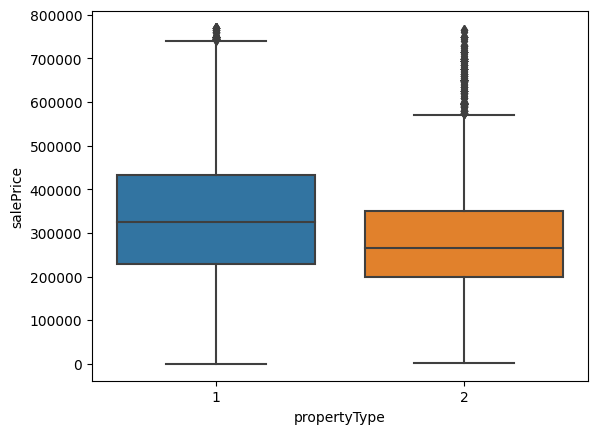

In [ ]:
df = df_immo_without_outlier
sns.boxplot(data=df, x= 'propertyType', y= 'salePrice')

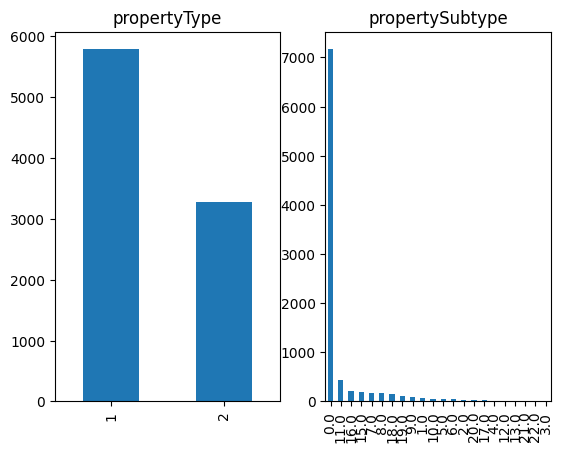

In [ ]:
categorical_features = ['propertyType', 'propertySubtype']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_features in enumerate(df[categorical_features]):
    df[categorical_features].value_counts().plot(kind='bar', ax=ax[i]).set_title(categorical_features)
fig.show()

<AxesSubplot: xlabel='propertySubtype', ylabel='salePrice'>

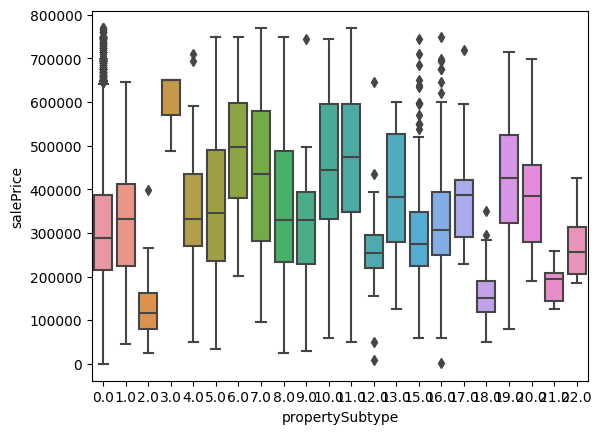

In [ ]:
df = df_immo_without_outlier
sns.boxplot(data=df, x= 'propertySubtype', y= 'salePrice')

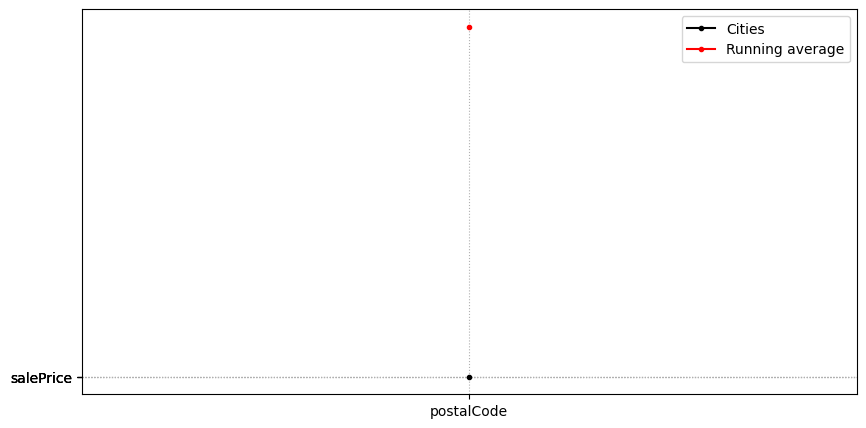

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot('postalCode', 'salePrice', 'k.-', label='Cities')
plt.plot('postalCode', average.salePrice, 'r.-', label='Running average')
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.grid(linestyle=':')
plt.legend()
plt.show()

### In your opinion, which 5 variables are the most important and why?


### NB: Dataset does not contain City column nor Region column. At this point aggregations can only be done Country level, Province level and postal code level.

### Which variables have the greatest influence on the price?


In [ ]:
# create new column for price per square meter

#df_immo_without_outlier['price_sqm'] = df_immo_without_outlier['salePrice'] / df_immo_without_outlier['propertySurface']
list_temp = []
index = 0
for c in df_immo_without_outlier['salePrice']:
    list_temp.append(c/df_immo_without_outlier['propertySurface'][index])
    index+=1

df_immo_without_outlier['price_sqm'] = list_temp


NameError: name 'df_immo_without_outlier' is not defined

### What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)


In [ ]:
# most & less expensive municipalities in Belgium by average price/square meter
# Remove mising values
df_immo_exp = df_immo_without_outlier.groupby('postalCode')['price_sqm'].agg('mean').sort_values(ascending=False) 
df_immo_exp.head()
df_immo_exp.tail()

postalCode
9940   NaN
9960   NaN
9968   NaN
9990   NaN
9991   NaN
Name: price_sqm, dtype: float64

### What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)

In [ ]:
# No information in dataset at municipality level and Region level.

### What are the most expensive municipalities in Flanders? (Average price, median, price, price per square meter)

In [ ]:
# No information in dataset at municipality level and Region level.

### What are the less expensive municipalities in Belgium? (Average price, median, price, price per square meter)

In [ ]:
# most & less expensive municipalities in Belgium by average price/square meter
# Remove mising values
df_immo_exp = df_immo_without_outlier.groupby('postalCode')['price_sqm'].agg('mean').sort_values(ascending=False) 
df_immo_exp.tail()

postalCode
9940   NaN
9960   NaN
9968   NaN
9990   NaN
9991   NaN
Name: price_sqm, dtype: float64

### What are the less expensive municipalities in Wallonia? (Average price, median, price, price per square meter)

In [ ]:
# No information in dataset at municipality level and Region level.

### What are the less expensive municipalities in Flanders? (Average price, median, price, price per square meter)

In [ ]:
# No information in dataset at municipality level and Region level.

In [42]:
df_immo_without_outlier.head()


,propertyImmoCode,provinceCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
0,10167355,WHT,7160,125000.0,1,0.0,0.0,0.0,0.0,157.0,0.0,3,0.0,0,0.0,0.0,0.0,0.0,0.0
1,10167354,WHT,7973,190000.0,1,11.0,6.0,0.0,0.0,629.0,4.0,3,1.0,0,0.0,0.0,1.0,0.0,0.0
2,10167353,VBR,1500,330000.0,2,16.0,2.0,156.0,2010.0,119.0,0.0,3,2.0,1,0.0,0.0,0.0,0.0,11.0
4,10167350,WHT,7301,110000.0,1,0.0,6.0,0.0,0.0,592.0,2.0,4,1.0,0,6.0,0.0,25.0,0.0,0.0
5,10167349,VAN,2170,198000.0,2,0.0,5.0,91.0,1991.0,252.0,0.0,2,1.0,0,0.0,0.0,0.0,0.0,4.0


In [43]:
df_immo_without_outlier.tail()

,propertyImmoCode,provinceCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
9732,10146866,WBR,1332,499000.0,1,0.0,2.0,156.0,1965.0,226.0,3.0,3,1.0,1,15.0,0.0,50.0,0.0,40.0
9733,10146865,VAN,2600,435000.0,1,0.0,5.0,173.0,1922.0,219.0,2.0,4,1.0,1,21.0,1.0,30.0,31.0,0.0
9735,10146863,BBR,1180,398000.0,2,0.0,2.0,94.0,2014.0,67.0,0.0,2,2.0,2,0.0,1.0,33.0,0.0,0.0
9737,10146860,VAN,2850,429000.0,2,0.0,0.0,97.0,2019.0,35.0,0.0,2,1.0,0,0.0,0.0,0.0,0.0,58.0
9738,10146859,VWV,8400,349000.0,1,7.0,1.0,0.0,0.0,150.0,2.0,1,1.0,0,0.0,1.0,0.0,0.0,0.0


In [44]:
df_immo_without_outlier.isnull().sum(axis=0)

propertyImmoCode     0
provinceCode         0
postalCode           0
salePrice            0
propertyType         0
propertySubtype      0
buildingCondition    0
propertySurface      0
constructionYear     0
EPC                  0
facades              0
bedrooms             0
bathrooms            0
showerrooms          0
kitchenSurface       0
basementSurface      0
livingroomSurface    0
gardenSurface        0
terraceSurface       0
dtype: int64

In [45]:
df_immo_without_outlier.dtypes

propertyImmoCode       int64
provinceCode          object
postalCode             int64
salePrice            float64
propertyType           int64
propertySubtype      float64
buildingCondition    float64
propertySurface      float64
constructionYear     float64
EPC                  float64
facades              float64
bedrooms               int64
bathrooms            float64
showerrooms            int64
kitchenSurface       float64
basementSurface      float64
livingroomSurface    float64
gardenSurface        float64
terraceSurface       float64
dtype: object

In [48]:
df_immo_without_outlier.isnull().sum().sum()


0

In [49]:
df_immo_without_outlier.isnull().values.sum()

0

In [50]:
df_immo_without_outlier.describe()

,propertyImmoCode,postalCode,salePrice,propertyType,propertySubtype,buildingCondition,propertySurface,constructionYear,EPC,facades,bedrooms,bathrooms,showerrooms,kitchenSurface,basementSurface,livingroomSurface,gardenSurface,terraceSurface
count,9.051000e+03,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9.051000e+03,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000
mean,1.014587e+07,5105.087394,324480.376312,1.361286,2.448790,1.921224,130.031378,1104.644680,1.259661e+03,1.997238,2.817700,1.056458,0.281184,5.042095,2.801348,14.949729,114.505027,8.359408
std,5.077786e+04,3084.554273,148074.643830,0.480400,5.254906,1.986330,215.649600,990.654957,9.143537e+04,1.422974,1.354477,1.092321,4.436232,16.872937,12.715670,24.476526,1538.990882,28.012538
min,8.754489e+06,1000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.015071e+07,2220.000000,219000.000000,1.000000,0.000000,0.000000,72.000000,0.000000,7.600000e+01,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.015672e+07,4431.000000,295000.000000,1.000000,0.000000,1.000000,120.000000,1930.000000,2.340000e+02,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.016205e+07,8434.000000,399000.000000,2.000000,0.000000,2.000000,175.000000,1980.000000,4.040000e+02,3.000000,3.000000,1.000000,0.000000,10.000000,1.000000,30.000000,1.000000,10.000000
max,1.016736e+07,9992.000000,770000.000000,2.000000,22.000000,6.000000,17842.000000,9999.000000,8.698102e+06,8.000000,33.000000,82.000000,415.000000,1065.000000,340.000000,1529.000000,80000.000000,2010.000000
